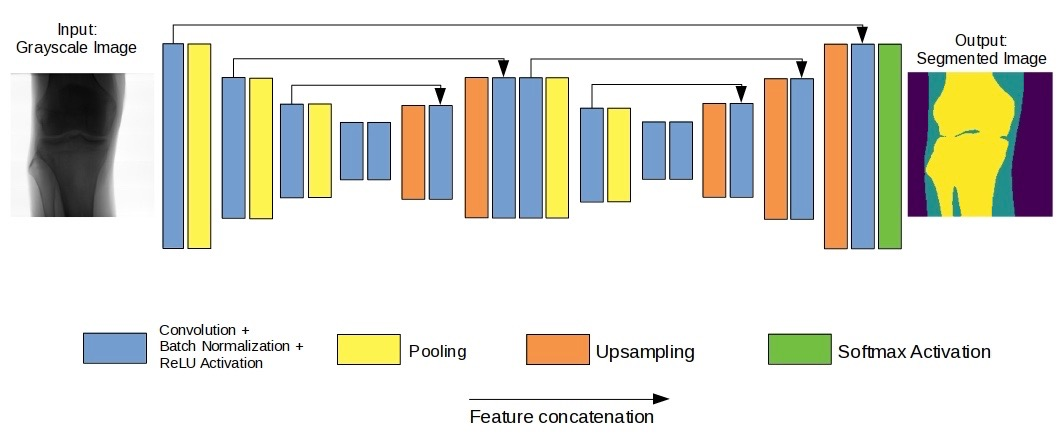

In [12]:
from keras.models import Model
from keras.layers import Input, Concatenate, Conv2D, MaxPooling2D, UpSampling2D, Dropout, Cropping2D
from keras.layers import BatchNormalization, Reshape, Layer
from keras.layers import Activation, Flatten, Dense

filter = [64, 128, 256, 512]

def model(input_shape = (64, 64, 3)):
  input = Input(shape = input_shape)

  #Down
  conv1 = Conv2D(filter[0], (3, 3), padding = 'same')(input)
  batch1 = BatchNormalization()(conv1)
  act1 = Activation('relu')(batch1)
  pool1 = MaxPooling2D(2, 2)(act1)

  #Down
  conv2 = Conv2D(filter[1], (3, 3), padding = 'same')(pool1)
  batch2 = BatchNormalization()(conv2)
  act2 = Activation('relu')(batch2)
  pool2 = MaxPooling2D(2, 2)(act2)

  #Down
  conv3 = Conv2D(filter[2], (3, 3), padding = 'same')(pool2)
  batch3 = BatchNormalization()(conv3)
  act3 = Activation('relu')(batch3)
  pool3 = MaxPooling2D(2, 2)(act3)

  #Flat
  conv4 = Conv2D(filter[3], (3, 3), padding = 'same')(pool3)
  batch4 = BatchNormalization()(conv4)
  act4 = Activation('relu')(batch4)
  conv5 = Conv2D(filter[3], (3, 3), padding = 'same')(act4)
  batch5 = BatchNormalization()(conv5)
  act5 = Activation('relu')(batch5)

  #Up
  up6 = UpSampling2D(size=(2, 2))(act5)
  conv6 = Conv2D(filter[2], (3, 3), padding = 'same')(up6)
  batch6 = BatchNormalization()(conv6)
  act6 = Activation('relu')(batch6)
  con6 = Concatenate()([act3,act6])

  #Up
  up7 = UpSampling2D(size=(2, 2))(con6)
  conv7 = Conv2D(filter[1], (3, 3), padding = 'same')(up7)
  batch7 = BatchNormalization()(conv7)
  act7 = Activation('relu')(batch7)
  con7 = Concatenate()([act2,act7])

  #Down
  conv8 = Conv2D(filter[1], (3, 3), padding = 'same')(con7)
  batch8 = BatchNormalization()(conv8)
  act8 = Activation('relu')(batch8)
  pool8 = MaxPooling2D(2, 2)(act8)

  #Down
  conv9 = Conv2D(filter[2], (3, 3), padding = 'same')(pool8)
  batch9 = BatchNormalization()(conv9)
  act9 = Activation('relu')(batch9)
  pool9 = MaxPooling2D(2, 2)(act9)

  #Flat
  conv10 = Conv2D(filter[3], (3, 3), padding = 'same')(pool9)
  batch10 = BatchNormalization()(conv10)
  act10 = Activation('relu')(batch10)
  conv11 = Conv2D(filter[3], (3, 3), padding = 'same')(act10)
  batch11 = BatchNormalization()(conv11)
  act11 = Activation('relu')(batch11)

  #Up
  up12 = UpSampling2D(size=(2, 2))(act11)
  conv12 = Conv2D(filter[2], (3, 3), padding = 'same')(up12)
  batch12 = BatchNormalization()(conv12)
  act12 = Activation('relu')(batch12)
  con12 = Concatenate()([act9,act12])

  #Up
  up13 = UpSampling2D(size=(2, 2))(con12)
  conv13 = Conv2D(filter[1], (3, 3), padding = 'same')(up13)
  batch13 = BatchNormalization()(conv13)
  act13 = Activation('relu')(batch13)
  con13 = Concatenate()([act8,act13])

  #Up
  up14 = UpSampling2D(size=(2, 2))(con13)
  conv14 = Conv2D(filter[0], (3, 3), padding = 'same')(up14)
  batch14 = BatchNormalization()(conv14)
  act14 = Activation('relu')(batch14)
  con14 = Concatenate()([act1,act14])

  #모르는 부분 참고 : https://github.com/JosephPB/XNet/blob/master/XNet.py
  conv15 = Conv2D(3, (1,1), padding="valid")(con14)
    
  reshape15 = Reshape((input_shape[0]*input_shape[1], 3))(conv15)

  act15 = Activation('softmax')(reshape15)

  model = Model(input, act15)

  return model

In [14]:
model().summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d_18 (Conv2D)             (None, 64, 64, 64)   1792        ['input_5[0][0]']                
                                                                                                  
 batch_normalization_14 (BatchN  (None, 64, 64, 64)  256         ['conv2d_18[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_15 (Activation)     (None, 64, 64, 64)   0           ['batch_normalization_14[0]